# Konstruksi Persamaan Friedmann
Oleh: Muhamad Rizki Septiawan
## Pengantar

<p style="text-align: justify;">Pada kesempatan ini saya ingin berbagi notebook, terkait konstruksi persamaan Friedmann. Konstruksi menggunakan pemrograman python, dibantu dengan package Gravipy. Diharapkan pembaca mendapatkan insight dari notebook ini, dan bisa mengembangkan untuk keperluan seperti skripsi atau yang lainnya.Persamaan Friedmann akan diturunkan menggunakan persamaan medan einstein, dengan asumsi alam semesta terisi materi fluida sempurna, sehingga kita akan menggunakan tensor Energi-Momentum untuk fluida sempurna.</p>
<p style="text-align: justify;">Kosmologi saat ini cukup baik dijelaskan oleh teori Relativitas Umum yang dicetuskan oleh Einstein. Teori ini menyatakan baik waktu maupun ruang keduanya tidak absolute, tentu ini sangat radikal bagi mekanika klasik. Karena keduanya tidak absolute untuk selanjutnya ruang dan waktu tidak dapat kita pisahkan keduanya merupakan komponen yang menyatu kita sebut <b>Ruang-Waktu (Spacetime)</b>. Menjadikan ruang dan waktu menjadi satu Manifold, secara signifikan telah membuat sejumlah besar teori fisika menjadi lebih sederhana serta membuat pemahaman seragam mengenai cara kerja alam semseta dalam lingkup kosmologi dan mekanika kuantum. Lalu pengamatan saat ini membawa kesimpulan bahwa alam semesta dinamik. Karakter dinamik ini digambarkan oleh sebuah persamaan yang kemudian kita namakan sebagai persamaan Friedmann. Persamaan ini merupakan konsekuensi dari pemilihan tensor metrik dinamik yang dinamakan tensor Friedmann-Robertson-Walker (FRW).</p>

## Tensor Metrik FRW
<p style="text-align: justify;">Tensor metrik sederhananya adalah sesuatu yang mengkarakterisasi sebuah ruang. Metrik FRW untuk koordinat spheris memiliki bentuk sebagai berikut:</p>

$$g_{\mu \nu} =\left[\begin{array}{cc}-1 & 0 & 0 & 0\\0 & \frac{a{\left(t \right)}^2}{- k r^{2} + 1} & 0 & 0\\0 & 0 &  r^{2} a{\left(t \right)}^2 & 0\\0 & 0 & 0 &  r^{2} a{\left(t \right)}^2 \sin^2{\left(\theta \right)}\end{array}\right]$$

<p style="text-align: justify;">Atau jika kita tulis dalam bentuk separasi dari dua titik kejadian ($ds^2=g_{\mu \nu}dx^2$), akan menghasilkan:</p>
<p style="text-align: center;"> $ds^2=$ <span style="color:red;">$-c^2dt^2$</span>$+$<span style="color:blue;">$\left( \frac{a{\left(t \right)}^2}{- k r^{2} + 1} dr^2 + r^{2} a{\left(t \right)}^2 d \theta^2 + r^{2} a{\left(t \right)}^2 \sin^2{\theta}d \phi^2 \right) $</span></p>
<p style="text-align: justify;">Bagian berwarna merah merupakan komponen temporal, sedangkan bagian berwarna biru merupakan komponen spasial. Mungkin ada pembaca yang belum mengetahui arti dari penulisan dimensi 3+1, ini memiliki makna dimensi 4 yang memiliki 3 komponen ruang (spasial) dan 1 komponen waktu (temporal). Perhatikan bagian spasial dari persamaan di atas! disetiap komponennya terdapat sebuah fungsi terhadap waktu ($a\left(t \right)$) ini merupakan sebuah faktor skala, yang mengindikasikan bahwa komponen ruang bersifat dinamik. Bagaimana karateristik dinamikanya? itu tergantung daripada bentuk $a\left(t \right)$. Bentuk $a\left(t \right)$ dapat diperoleh dengan mencari solusi daripada persamaan Friedmann yang nanti akan kita kontruksi. Lalu $k$ merupakan konstanta kurvatur dari ruang bernilai -1, 0, dan/atau 1.</p>
<p>Langsung saja, kita keprogramnya:</p>

In [1]:
#import package yang diperlukan
from gravipy.tensorial import *
from sympy import init_printing, latex, sqrt, trace, pi
from IPython.display import display, Math
import inspect
init_printing()

In [2]:
#Inisialisasi simbol yang akan digunakan
t, r, theta, phi, c, k, lamda = symbols("t r theta phi c k Lambda")

#Membuat sebuat fungsi a
a = Function('a')
at = a(t)


#Menentukan variable koordinat
x = Coordinates('\chi', [t, r, theta, phi])

In [3]:
#Membuat tensor metric FRW
Metric = diag(1, -1*(at**2)/(1-k*r**2), -1*(at**2)*r**2, -1*(at**2)*r**2*(sin(theta)**2))
g = MetricTensor('g', x, Metric) #MetricTensor class yang telah tersedia pada package garivipy

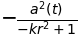

In [4]:
#untuk melihat hasilnya, perindexnya, bisa kita gunakan g(index mu, index nu)
#silahkan ubah angka dalam tanda kurung, dengan index komponen yang ingin dilihat, dimulai dari angka 1, dan
g(2,2) 

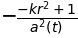

In [5]:
#tanda minus untuk bentuk kontravariannya
g(-2,-2)

In [6]:
#untuk melihat semua komponen dalam bentuk matriks
g(All,All)

⎡1      0           0              0        ⎤
⎢                                           ⎥
⎢      2                                    ⎥
⎢    -a (t)                                 ⎥
⎢0  ──────────      0              0        ⎥
⎢        2                                  ⎥
⎢   - k⋅r  + 1                              ⎥
⎢                                           ⎥
⎢                 2  2                      ⎥
⎢0      0       -r ⋅a (t)          0        ⎥
⎢                                           ⎥
⎢                            2  2       2   ⎥
⎣0      0           0      -r ⋅a (t)⋅sin (θ)⎦

In [7]:
#tensor metrik kontravariannya
g(-All,-All)

⎡1        0            0             0        ⎤
⎢                                             ⎥
⎢    ⎛     2    ⎞                             ⎥
⎢   -⎝- k⋅r  + 1⎠                             ⎥
⎢0  ──────────────     0             0        ⎥
⎢        2                                    ⎥
⎢       a (t)                                 ⎥
⎢                                             ⎥
⎢                     -1                      ⎥
⎢0        0         ────────         0        ⎥
⎢                    2  2                     ⎥
⎢                   r ⋅a (t)                  ⎥
⎢                                             ⎥
⎢                                   -1        ⎥
⎢0        0            0      ────────────────⎥
⎢                              2  2       2   ⎥
⎣                             r ⋅a (t)⋅sin (θ)⎦

## Simbol Christoffel

<p style="text-align: justify;">Simbol Cristoffel (atau koefisien koneksi affine) adalah cara mendefinisikan kesejajaran antara titik-titik tetangga dalam manifold. Simbol Cristoffel dibangun oleh turunan pertama tensor metrik, dimana tensor metrik sebagai cara mendefinisikan jarak antara dua buah titik. Bentuk matematis Simbol Christoffel:</p>
$$
\Gamma_{\rho \mu \nu} = \frac{1}{2}\left( \frac{\partial g_{\mu \rho}}{\partial x^\nu} + \frac{\partial g_{\rho \nu}}{\partial x^\mu}- \frac{\partial g_{\mu \nu}}{\partial x^\rho} \right)
$$

<p style="text-align: justify;">Persamaan diatas merupakan Simbol Christoffel jenis pertama. Jika kita kalikan dengan $g^{\sigma \rho}$ maka akan menghasilkan:</p>
$$
\Gamma^{\sigma}_{\mu \nu} = \frac{1}{2} g^{\sigma \rho} \left( \frac{\partial g_{\mu \rho}}{\partial x^\nu} + \frac{\partial g_{\rho \nu}}{\partial x^\mu}- \frac{\partial g_{\mu \nu}}{\partial x^\rho} \right)
$$
<p style="text-align: justify;">Persamaan ini kemudian dinamakan Simbol Cristoffel jenis kedua. Pada package Gravipy sendiri class yang tersedia untuk Simbol Christoffel adalah yang jenis pertama. Simbol Christoffel jenis kedua sendiri dapat dibuat sendiri. Untuk menghemat tenaga, disini menggunakan class dari Gravipy saja.</p>


In [8]:
#Simbol Christoffel jenis pertama
Christof = Christoffel('Gamma', g)

In [9]:
#untuk mendapatkan latex script R
for i in range(1, 5):
        #a = " \\begin{equation} \n R_{%d %d} =" + latex(Ricci(i, j)) + '\\\\ \n \\end{equation} \n'
        display(Math('\\Gamma_{'+latex(i-1)+'\\mu \\nu} ='+latex(Christof(i, All, All))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Tensor Riemann dan Tensor Ricci
<p style="text-align: justify;">Tensor Riemann menyatakan kelengkungan ruang-waktu. Tensor ini juga merupakan sebuah fungsi dari Simbol Christoffel jenis pertama. Berikut bentuk matematisnya:</p>
$$
R_{\mu \nu \rho \sigma}=\frac{\partial \Gamma_{\mu \nu \sigma}}{\partial x^{\rho}}-\frac{\partial \Gamma_{\mu \nu \rho}}{\partial x^{\sigma}}+\Gamma_{\nu \sigma}^{\alpha} \Gamma_{\mu \rho \alpha}-\Gamma_{\nu \rho}^{\alpha} \Gamma_{\mu \sigma \alpha}-\frac{\partial g_{\mu \alpha}}{\partial x^{\rho}} \Gamma_{\nu \sigma}^{\alpha}+\frac{\partial g_{\mu \alpha}}{\partial x^{\sigma}} \Gamma_{\nu \rho}^{\alpha}
$$
<p style="text-align: justify;">Melakukan kontraksi pada persamaan diatas akan menghasilkan sebuah tensor yang dinamakan tensor Ricci</p>
$$
R_{\mu \nu}=R_{\mu \rho \nu}^{\rho}
$$
$$
R_{\mu \nu} = \partial_{\nu} \Gamma^{\rho}_{\nu \rho} - \partial_{\rho} \Gamma^{\rho}_{\mu \nu} + \Gamma^{\sigma}_{\mu \rho} \Gamma^{\rho}_{\nu \sigma} - \Gamma^{\sigma}_{\mu \nu} \Gamma^{\rho}_{\sigma \rho}
$$
Kita dapat memperoleh suatu skalar, yang dibentuk dari tensor Riemann maupun tensor Ricci, dengan mengkontraksikan seluruh indeks pada tensor-tensor tersebut:
$$R=R^{\nu}_{\nu}=g^{\mu \nu}R_{\mu \nu}$$

In [10]:
#tensor Ricci
Ricci = Ricci('Ri', g)

In [11]:
#menampilkan komponen tensor Ricci
Ricci(All, All)

⎡     2                                                                       
⎢    d                                                                        
⎢-3⋅───(a(t))                                                                 
⎢     2                                                                       
⎢   dt                                                                        
⎢─────────────                     0                                          
⎢     a(t)                                                                    
⎢                                                                             
⎢                ⎛             2                     2⎞                       
⎢                ⎜            d            ⎛d       ⎞ ⎟                       
⎢               -⎜2⋅k + a(t)⋅───(a(t)) + 2⋅⎜──(a(t))⎟ ⎟                       
⎢                ⎜             2           ⎝dt      ⎠ ⎟                       
⎢                ⎝           dt                     

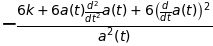

In [12]:
#skalar Ricci
Ricci.scalar()

## Tensor Einstein
<p style="text-align: justify;">Einstein membangun sebuah persamaan medan yang mendeskripsikan bagaimana sistem gravitasi bekerja.  Persamaan medan ini menerapkan konsep geometri Riemann, yang pada akhirnya menuntun kita pada konsep yang menyatakan gravitasi sebagai manifestasi dari kelengkungan ruang-waktu yang tertuang dalam tensor Einstein yaitu,</p>
$$
G_{\mu v}=R_{\mu v}-\frac{1}{2} g_{\mu v} R
$$
<p style="text-align: justify;">Berikut programmnya:</p>

In [13]:
#tensor Einstein
G = Einstein('G', Ricci)

In [14]:
#menampilkan tensor Einstein dalam bentuk matriks
G(All, All)

⎡  ⎛              2⎞                                                          
⎢  ⎜    ⎛d       ⎞ ⎟                                                          
⎢3⋅⎜k + ⎜──(a(t))⎟ ⎟                                                          
⎢  ⎝    ⎝dt      ⎠ ⎠                                                          
⎢───────────────────                  0                                      0
⎢        2                                                                    
⎢       a (t)                                                                 
⎢                                                                             
⎢                                  2                   2                      
⎢                                 d          ⎛d       ⎞                       
⎢                     k + 2⋅a(t)⋅───(a(t)) + ⎜──(a(t))⎟                       
⎢                                  2         ⎝dt      ⎠                       
⎢                                dt                 

## Persamaan Medan Einstein
### Tensor Einstein dengan Konstanta Kosmologi
<p style="text-align: justify;">Sebelum meninjau bentuk persamaan Einstein lebih dalam, kita tinjau persamaan sebelumnya apabila tetapan kosmologi $\Lambda$ diikutsertakan, maka persamaan tensor Einstein menjadi</p>
$$
G_{\mu v}=R_{\mu v}-\frac{1}{2} g_{\mu v} R-\Lambda g_{\mu v}
$$

In [15]:
#menambahkan konstanta kosmologi pada tensor einstein sebelumnya
G00 = G(1,1)-g(1,1)*lamda
G11 = G(2,2)-g(2,2)*lamda
G22 = G(3,3)-g(3,3)*lamda
G33 = G(4,4)-g(4,4)*lamda
G_matrix = diag(G00,G11,G22,G33)
G_with_constant = MetricTensor('T_munu ', x, G_matrix)

In [16]:
#menampilkan komponen yang tidak nol pada tensor Einstein dengan konstanta kosmologi
for i, j in list(variations(range(1, 5), 2, True)):
    if G_with_constant(i, j) != 0:
        display(Math('G_{'+latex(i-1)+latex(j-1)+'}='+latex(G_with_constant(i,j))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Hubungan Medan Einstein dengan Materi
<p style="text-align: justify;">Densitas dari massa menimbulkan potensial medan gravitasi, kemudian diperluas menjadi tensor energi-momentum $T_{u v}$ dengan densitas massa-energi termasuk komponen didalamnya. Persamaan medan Einstein menghubungkan tensor kelengkungan ruang-waktu $\left(R_{\mu v}\right)$ dengan tensor energi momentum $\left(T_{\mu v}\right)$ dalam bentuk:</p>
$$
R_{\mu v}-\frac{1}{2} g_{\mu v} R=-\kappa T_{\mu v}
$$
Sehingga persamaan dengan tetapan kosmologi menjadi:
$$
R_{\mu v}-\frac{1}{2} g_{\mu \nu} R-\Lambda g_{\mu \nu}=-\kappa T_{\mu \nu}
$$
dengan $\kappa = {8 \pi G \over c^4} $. Untuk memudahkan selanjutnya kita buat  $c=1$.
<p style="text-align: justify;">Persamaan diatas menggambarkan tautan antara gravitasi dengan materi, dimana konsep ini telah dikenal baik dalam menjelaskan alam semesta. Selanjutnya jika materi diasumsikan sebagai fluida sempurna yaitu pemodelan paling sederhana dari fluida: tanpa tegangan geser, viskositas, dan konduksi panas. Bentuk tensor energi-momentum dari fluida sempurna sebagai berikut:</p>
$$
T_{\mu \nu} = (\rho-p)u_{\mu}u_{\nu}-g_{\mu \nu}p
$$
<p style="text-align: justify;">dengan $u_{\mu}$ adalah kecepatan-4. Dan akan diambil bentuk: $u_{\mu} = \left(1,  0,  0,   0 \right)$ sehingga:</p>
$$
u_{\mu}u_{\nu} = \left[\begin{array}{cc}1 & 0 & 0 & 0\\0 & 0 & 0 & 0\\0 & 0 &  0 & 0\\0 & 0 & 0 & 0 \end{array}\right]
$$

In [17]:
#Tensor energi-momentum untuk fluida sempurna
ro, pm = symbols('rho, p')
T00 = g(1,1)*ro
T11 = g(2,2)*(-pm)
T22 = g(3,3)*(-pm)
T33 = g(4,4)*(-pm)
T_matrix = diag(T00,T11,T22,T33)
T_perfect_fluid = MetricTensor('T_munu ', x, T_matrix)

In [18]:
#menampilkan tensor energi-momentum fluida sempurna
T_perfect_fluid(All,All)

⎡ρ      0           0               0         ⎤
⎢                                             ⎥
⎢       2                                     ⎥
⎢    p⋅a (t)                                  ⎥
⎢0  ──────────      0               0         ⎥
⎢        2                                    ⎥
⎢   - k⋅r  + 1                                ⎥
⎢                                             ⎥
⎢                  2  2                       ⎥
⎢0      0       p⋅r ⋅a (t)          0         ⎥
⎢                                             ⎥
⎢                              2  2       2   ⎥
⎣0      0           0       p⋅r ⋅a (t)⋅sin (θ)⎦

## Persamaan Friedmann
<p style="text-align: justify;">Dinamika kosmologi dalam geometri ruang-waktu sepenuhnya ditentukan oleh faktor skala $a(t)$. Untuk mengetahui bentuk $a(t)$ diperlukan solusi Persamaan Medan Einstein. Representasi dari solusi persamaan medan Einstein untuk metrik FRW disebut Persamaan Friedmann, dengan bentuk persamaan sebagai berikut:</p>

$$
\frac{8 \pi G}{3} \rho = \frac{1}{a^2} \left(\dot{a} +kc^2\right)-\frac{\Lambda}{3}
$$


$$- \frac{8 \pi G}{c^2} p = \frac{\ddot{a}}{a} +\frac{\dot{a}^2}{a^2}+\frac{kc^2}{a^2}-\Lambda$$

dengan $\dot{a} =\frac{d}{d t} a$, jika digunakan $c=1$, akan menghasilkan:

$$\frac{8 \pi G}{3} \rho = - \frac{1}{a^2} \left(\dot{a} +k\right)-\frac{\Lambda}{3}$$

dan

$$- \frac{8 \pi G}{3} p = \frac{\ddot{a}}{a} +\frac{\dot{a}^2}{a^2}+\frac{k}{a^2}-\Lambda$$


In [19]:
#set persamaan untuk membangun persamaan friedmann
G0 = symbols('G')
T=MetricTensor('T',x, G_with_constant(All, All)-8*pi*G0*T_perfect_fluid(All,All))
#mengambil set persamaannya
for i, j in list(variations(range(1, 5), 2, True)):
    if T(i, j) !=0:
        C = T(i,j)
        if i==2 and j==2:
            A = C*((-k*r**2+1)/at**2)
            display(Math(latex(A.simplify())+"= 0"))
        elif i==3 and j==3:
            A = C*(1/(r**2*at**2))
            display(Math(latex(A.simplify())+"= 0"))
        elif i==4 and j==4:
            A = C*(1/(sin(theta)**2*r**2*at**2))
            display(Math(latex(A.simplify())+"= 0"))
        else:
            display(Math(latex(C)+"= 0"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<p style="text-align: justify;">persamaan pertama diatas bila di sederhanakan akan menjadi:</p>
$$- 8 \pi G \rho - \Lambda + \frac{3 \left(k + \left(\frac{d}{d t} a{\left(t \right)}\right)^{2}\right)}{a^{2}{\left(t \right)}}=0$$


$$ \frac{8 \pi G}{3} \rho= \frac{1}{a^{2}{\left(t \right)}}\left(\left(\frac{d}{d t} a{\left(t \right)}\right)^{2}+k \right)-\frac{\Lambda}{3}  $$
persamaan kedua akan menghasilkan:
$$8 \pi G p + \Lambda - \frac{k}{a^{2}{\left(t \right)}} - \frac{2 \frac{d^{2}}{d t^{2}} a{\left(t \right)}}{a{\left(t \right)}} - \frac{\left(\frac{d}{d t} a{\left(t \right)}\right)^{2}}{a^{2}{\left(t \right)}}=0$$
$$-8 \pi G p = \frac{k}{a^{2}{\left(t \right)}} + \frac{2 \frac{d^{2}}{d t^{2}} a{\left(t \right)}}{a{\left(t \right)}} + \frac{\left(\frac{d}{d t} a{\left(t \right)}\right)^{2}}{a^{2}{\left(t \right)}} - \Lambda$$
<p style="text-align: justify;">Persamaan ketiga dan keempat hanya akan mengulang persamaan kedua.Perhatikan bahwa persamaan diatas tak lain adalah persamaan Friedmann.</p>
<p style="text-align: justify;">Persamaan-persamaan ini memberikan deskripsi kecepatan dan percepatan alam semesta dalam mengembang.</p>

## Simpulan
<p style="text-align: justify;">Persamaan Friedmaan telah berhasil dikonstruksi dengan menggunakan persamaan Medan Einstein, dan mengasumsikan materi berupa fluida sempurna.</p>

## Pesan
<p style="text-align: justify;">Tambahkan solusi dari persamaan-persamaan Friedmann tersebut. Silahkan kembangkan bagi yang berminat, misal menambahkan tensor energi-momentum yang lain dapat berupa sektor gelap (Dark) atau medan skalar guna mendapatkan model alam semesta yang semakin baik.</p>

## Referensi
1. Taufiq H.  2010. Teori Relativitas: Sebuah Pengantar. Bandung (ID): ITB Pr.
2. Sungkar EG. 2018. Pengantar Teori Relativitas Umum dan Kosmologi[Internet]
3. Hobson MP, Efstathio GP, dan Lasenby AN. 2006. General Relativity An Introduction for Physicist. Cambridge(UK): Cambridge University Press.